# Problem description (Earthquake damage prediction)
**Through this model I'm trying to predict the original variable damage_grade, which represents a level of damage to buildings that were hit by an earthquake in Nepal. There are 3 grades of damage**

- 1: represents low damage
- 2: represents a medium amount of damage
- 3: represents almost complete destruction


In [1]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/drivendata-public-assets/nepal-quake-bm-2.JPG')

- ***Features***
    - The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

    - There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.


- ***Description of features***
    - ***geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int):*** geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    - ***count_floors_pre_eq (type: int):*** number of floors in the building before the earthquake.
    - ***age (type: int):*** age of the building in years.
    - ***area_percentage (type: int):*** normalized area of the building footprint.
    - ***height_percentage (type: int):*** normalized height of the building footprint.
    - ***land_surface_condition (type: categorical):*** surface condition of the land where the building was built. Possible values: n, o, t.
    - ***foundation_type (type: categorical):*** type of foundation used while building. Possible values: h, i, r, u, w.
    - ***roof_type (type: categorical):*** type of roof used while building. Possible values: n, q, x.
    - ***ground_floor_type (type: categorical):*** type of the ground floor. Possible values: f, m, v, x, z.
    - ***other_floor_type (type: categorical):*** type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
    - ***position (type: categorical):*** position of the building. Possible values: j, o, s, t.
    - ***plan_configuration (type: categorical):*** building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
    - ***has_superstructure_adobe_mud (type: binary):*** flag variable that indicates if the superstructure was made of Adobe/Mud.
    - ***has_superstructure_mud_mortar_stone (type: binary):*** flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
    - ***has_superstructure_stone_flag (type: binary):*** flag variable that indicates if the superstructure was made of Stone.
    - ***has_superstructure_cement_mortar_stone (type: binary):*** flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
    - ***has_superstructure_mud_mortar_brick (type: binary):*** flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
    - ***has_superstructure_cement_mortar_brick (type: binary):*** flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
    - ***has_superstructure_timber (type: binary):*** flag variable that indicates if the superstructure was made of Timber.
    - ***has_superstructure_bamboo (type: binary):*** flag variable that indicates if the superstructure was made of Bamboo.
    - ***has_superstructure_rc_non_engineered (type: binary):*** flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
    - ***has_superstructure_rc_engineered (type: binary):*** flag variable that indicates if the superstructure was made of engineered reinforced concrete.
    - ***has_superstructure_other (type: binary):*** flag variable that indicates if the superstructure was made of any other material.
    - ***legal_ownership_status (type: categorical):*** legal ownership status of the land where building was built. Possible values: a, r, v, w.
    - ***count_families (type: int):*** number of families that live in the building.
    - ***has_secondary_use (type: binary):*** flag variable that indicates if the building was used for any secondary purpose.
    - ***has_secondary_use_agriculture (type: binary):*** flag variable that indicates if the building was used for agricultural purposes.
    - ***has_secondary_use_hotel (type: binary):*** flag variable that indicates if the building was used as a hotel.
    - ***has_secondary_use_rental (type: binary):*** flag variable that indicates if the building was used for rental purposes.
    - ***has_secondary_use_institution (type: binary):*** flag variable that indicates if the building was used as a location of any institution.
    - ***has_secondary_use_school (type: binary):*** flag variable that indicates if the building was used as a school.
    - ***has_secondary_use_industry (type: binary):*** flag variable that indicates if the building was used for industrial purposes.
    - ***has_secondary_use_health_post (type: binary):*** flag variable that indicates if the building was used as a health post.
    - ***has_secondary_use_gov_office (type: binary):*** flag variable that indicates if the building was used fas a government office.
    - ***has_secondary_use_use_police (type: binary):*** flag variable that indicates if the building was used as a police station.
    - ***has_secondary_use_other (type: binary):*** flag variable that indicates if the building was secondarily used for other purposes.

## Importing liabraries

In [2]:
#importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')

## Reading Dataset

In [3]:
# importing datasets
train=pd.read_csv("/kaggle/input/richters-predictor-modeling-earthquake-damage/train_values.csv")
labels=pd.read_csv("/kaggle/input/richters-predictor-modeling-earthquake-damage/train_labels.csv")
# improrting tesing dataset
test=pd.read_csv("/kaggle/input/richters-predictor-modeling-earthquake-damage/test_values.csv")
# adding labels to train dataset
train["damage_grade"]=labels["damage_grade"]
print("shape of the training dataset is : ",chr(128516),train.shape)
print("shape of the test dataset is  : ",chr(128513),test.shape)

shape of the training dataset is :  😄 (260601, 40)
shape of the test dataset is  :  😁 (86868, 39)


In [4]:
train.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,2
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
# exploring the statstical fearures of training dataset.
train.describe().T.style.background_gradient(cmap='Set2',low =0.4,high=0.1,axis=0)

,count,mean,std,min,25%,50%,75%,max
building_id,260601,525675,304545,4,261190,525757,789762,1.05293e+06
geo_level_1_id,260601,13.9004,8.03362,0,7,12,21,30
geo_level_2_id,260601,701.075,412.711,0,350,702,1050,1427
geo_level_3_id,260601,6257.88,3646.37,0,3073,6270,9412,12567
count_floors_pre_eq,260601,2.12972,0.727665,1,2,2,2,9
age,260601,26.535,73.5659,0,10,15,30,995
area_percentage,260601,8.01805,4.39223,1,5,7,9,100
height_percentage,260601,5.43437,1.91842,2,4,5,6,32
has_superstructure_adobe_mud,260601,0.0886451,0.284231,0,0,0,0,1
has_superstructure_mud_mortar_stone,260601,0.761935,0.4259,0,1,1,1,1


In [6]:
# exploring the statstical fearures of training dataset (object).
train.describe(include="object").T

,count,unique,top,freq
land_surface_condition,260601,3,t,216757
foundation_type,260601,5,r,219196
roof_type,260601,3,n,182842
ground_floor_type,260601,5,f,209619
other_floor_type,260601,4,q,165282
position,260601,4,s,202090
plan_configuration,260601,10,d,250072
legal_ownership_status,260601,4,v,250939


In [7]:
# checking the types of varibles in the dataset(int,float,object)
dtypes=pd.DataFrame(train.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=train.nunique()
dtypes["Null Values"]=train.isnull().sum()
dtypes["% null Values"]=train.isnull().sum()/len(train)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
building_id,int64,260601,0,0
geo_level_1_id,int64,31,0,0
geo_level_2_id,int64,1414,0,0
geo_level_3_id,int64,11595,0,0
count_floors_pre_eq,int64,9,0,0
age,int64,42,0,0
area_percentage,int64,84,0,0
height_percentage,int64,27,0,0
land_surface_condition,object,3,0,0
foundation_type,object,5,0,0


### ***Damage Grade***

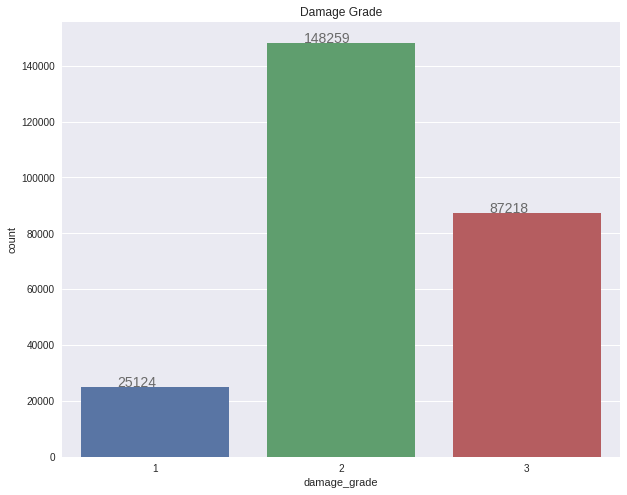

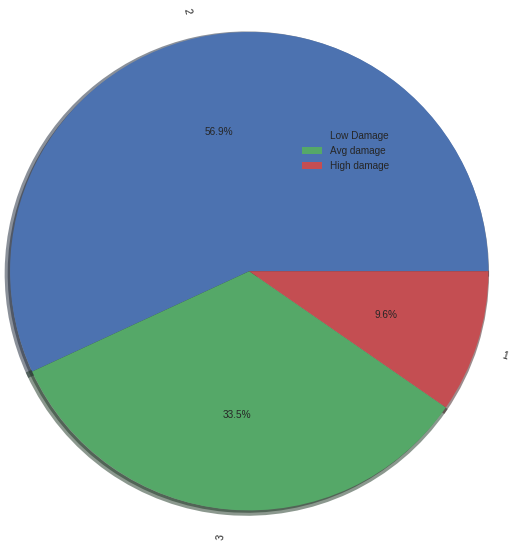

In [8]:
# checking the dependent variable --> `damage_grade`
plt.figure(figsize=(10,8))
ax=sns.countplot("damage_grade",data=train)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+3, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.title("Damage Grade")
plt.show()  
###############################################################
#                       pie plot                              #                                                            
###############################################################
train["damage_grade"].dropna().astype(int).value_counts().plot.pie(autopct="%.1f%%", 
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=2
                                                    )
plt.legend(["Low Damage","Avg damage","High damage"])
plt.show()

 - ***OBSERVATIONS***
    - 1: represents low damage
    - 2: represents a medium amount of damage
    - 3: represents almost complete destruction
    - `9.61%` of bulidings fall under the 'low damage' category.
    - `56.9%` of bulidings fall under the "medium damage" category 
    - `33.48%` of bulidings fall under the "complete destruction" category.

### ***Now we'll try to see if the age of the building has any affect on the damage caused by the earthquake ?***

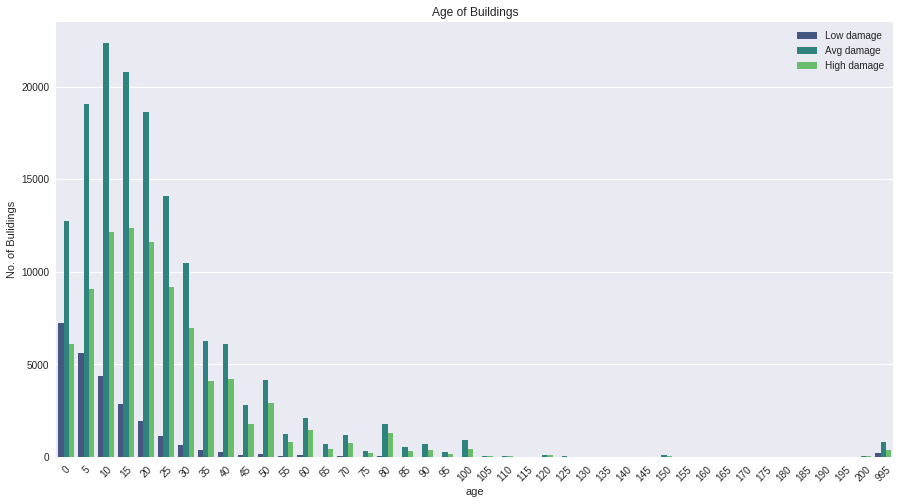

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(x=train["age"],hue=train["damage_grade"],palette="viridis")
plt.ylabel("No. of Bulidings")
plt.title("Age of Buildings")
plt.legend(["Low damage","Avg damage","High damage"],loc="upper right")
plt.xticks(rotation=45)
plt.show()

- ***OBSERVATIONS***
    - Ages of majority of the bulidings are between 0-50 years, more than 90% of the houses fall under this range.
    - 2nd highest no. of bulidings are in the category "high damage".
    - The above chart infers that despite the age of building ,most of the time the damage caused to the building is average damage. 
    

### ***Let's try to find out if the area of a buliding has any correlation to the damage caused by the earthquake ?***

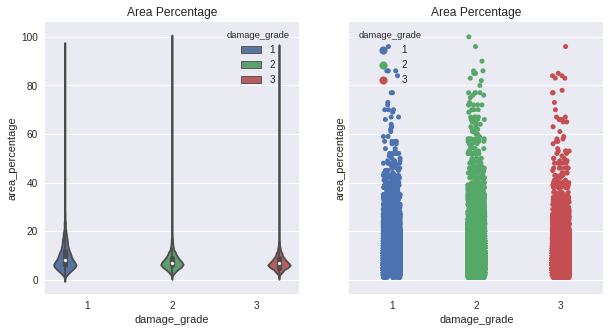

<Figure size 720x648 with 0 Axes>

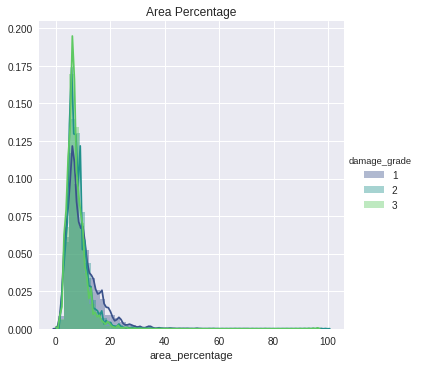

In [10]:
fig,ax=plt.subplots(1,2,figsize=(10,5), sharey=True)
###############################################################
#                      Violin plot                            #
###############################################################

sns.violinplot(data=train,x='damage_grade',y='area_percentage',hue='damage_grade',
                   split=False,ax=ax[0])

sns.stripplot(data=train,x='damage_grade',y='area_percentage',hue='damage_grade',jitter=True,ax=ax[1])
#plt.ylabel("Company Status",**font)
ax[0].set_title("Area Percentage")
ax[1].set_title("Area Percentage")
plt.show()
###############################################################
#                       Facet Grid                            #
###############################################################

plt.figure(figsize=(10,9))
sns.FacetGrid(train,hue='damage_grade',height=5,palette="viridis")\
    .map(sns.distplot,'area_percentage')\
    .add_legend()
plt.title("Area Percentage")
plt.show()

- ***OBSERVATIONS***
    - The above plots infers that as the area of the buliding increases the damaged caused to it also increases. 

### ***Can we correlate the height of buildings with the amount of damage caused ?***

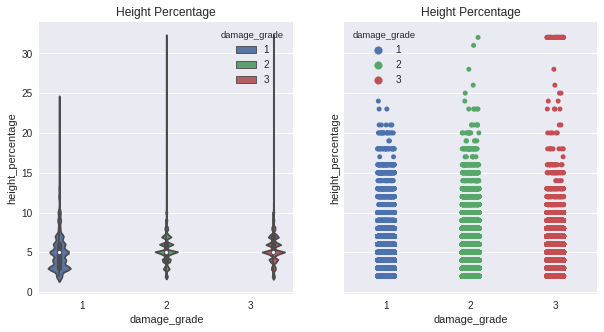

<Figure size 720x360 with 0 Axes>

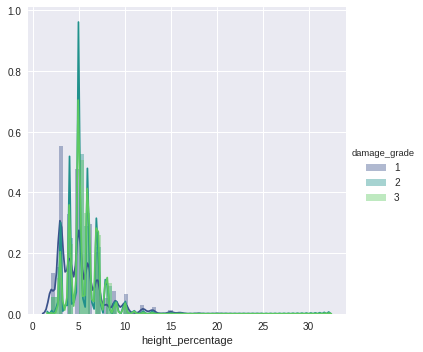

In [11]:
fig,ax=plt.subplots(1,2,figsize=(10,5), sharey=True)
###############################################################
#                      Violin plot                            #
###############################################################

sns.violinplot(data=train,x='damage_grade',y='height_percentage',hue='damage_grade',
                   split=False,ax=ax[0])

sns.stripplot(data=train,x='damage_grade',y='height_percentage',hue='damage_grade',jitter=True,ax=ax[1])
#plt.ylabel("Company Status",**font)
ax[0].set_title("Height Percentage")
ax[1].set_title("Height Percentage")
plt.show()
###############################################################
#                       Facet Grid                            #
###############################################################

plt.figure(figsize=(10,5))
sns.FacetGrid(train,hue='damage_grade',height=5,palette="viridis")\
    .map(sns.distplot,'height_percentage')\
    .add_legend()
plt.show()

 - ***OBSERVATIONS***
    - The above plots infers that as the height of the buliding increases the damaged caused to it also increases.

### ***Correlation between no. of floors in a building and damage caused?***

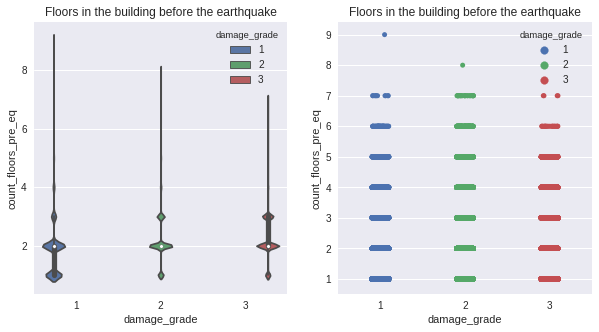

<Figure size 720x360 with 0 Axes>

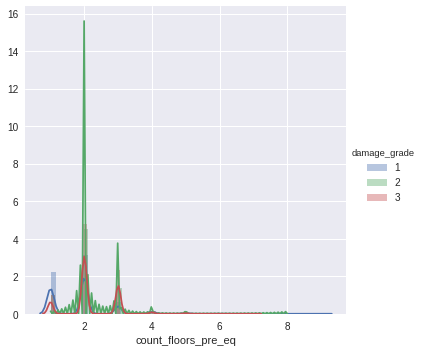

In [12]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
###############################################################
#                      Violin plot                            #
###############################################################

sns.violinplot(data=train,x='damage_grade',y='count_floors_pre_eq',hue='damage_grade',
                   split=False,ax=ax[0])

sns.stripplot(data=train,x='damage_grade',y='count_floors_pre_eq',hue='damage_grade',jitter=True,ax=ax[1])
#plt.ylabel("Company Status",**font)
ax[0].set_title("Floors in the building before the earthquake")
ax[1].set_title("Floors in the building before the earthquake")
plt.show()
###############################################################
#                       Facet Grid                            #
###############################################################
plt.figure(figsize=(10,5))
sns.FacetGrid(train,hue='damage_grade',height=5)\
    .map(sns.distplot,'count_floors_pre_eq')\
    .add_legend()
plt.show()

### ***Families affected due to earthquake ?***

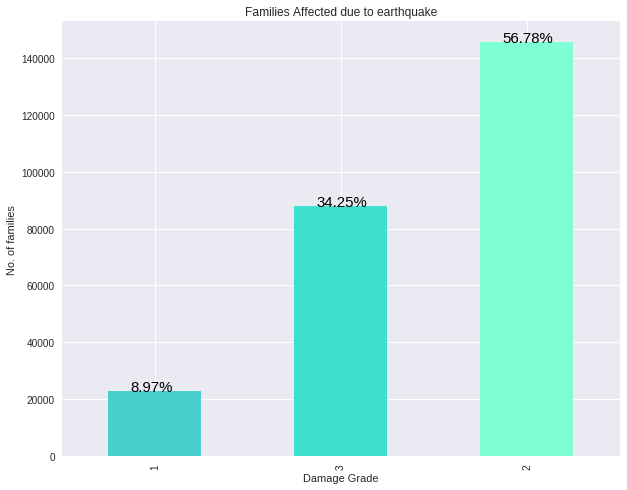

In [13]:
plt.figure(figsize=(10,8))
ax=train.groupby("damage_grade")["count_families"].sum().sort_values().plot.bar(color=["mediumturquoise","turquoise","aquamarine"],
                                                                               )
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')
plt.title("Families Affected due to earthquake")
plt.ylabel("No. of families")
plt.xlabel("Damage Grade")
plt.show()

- ***OBSERVATIONS***
    - `34.25%` of the families lived in houses which were prone to high damage. Therefore, making them the most exposed group in the population to Critical Health and Financial Damages. 
    - `56.78%` of the families lived in decent houses but were affected the most in the entire population. 
    - `8.97%` of the families lived in well built houses which were able to withstand the earthquake. 

### ***Analyse Categorical Features with respect to Damage Grade ?***

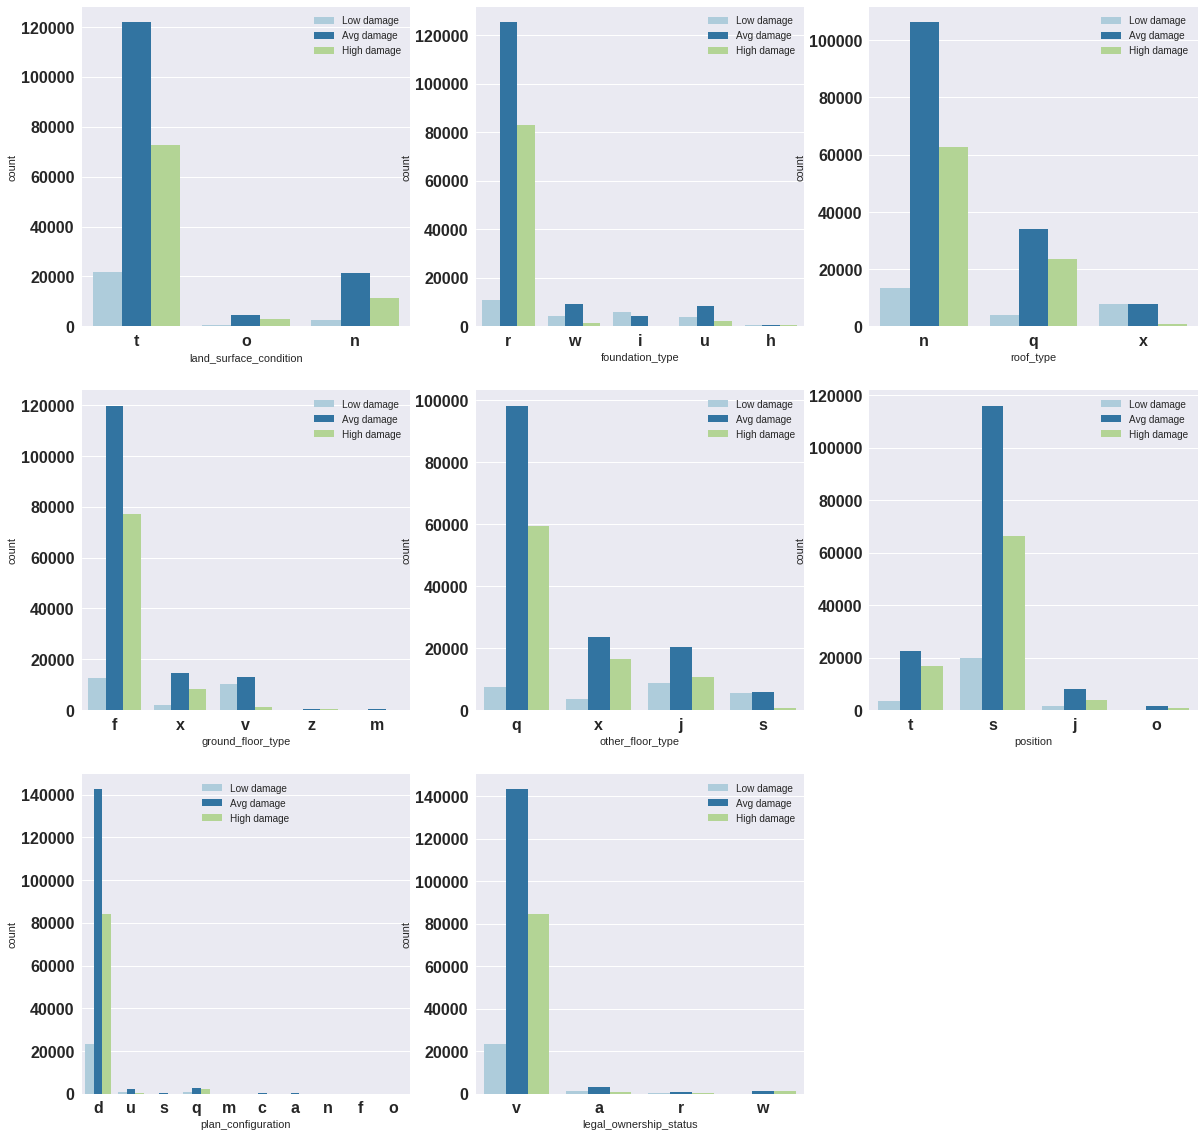

In [14]:
cat_cols=train.select_dtypes(include="object")
font={'weight' : 'bold',
        'size': 16}       
q=1
plt.figure(figsize=(20,20))
for j in cat_cols:
    plt.subplot(3,3,q)
    ax=sns.countplot(train[j].dropna(),palette="Paired",hue=train["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    plt.legend(["Low damage","Avg damage","High damage"])
    q+=1
plt.show()

### ***Correlation of independent variables with dependant variable ?***

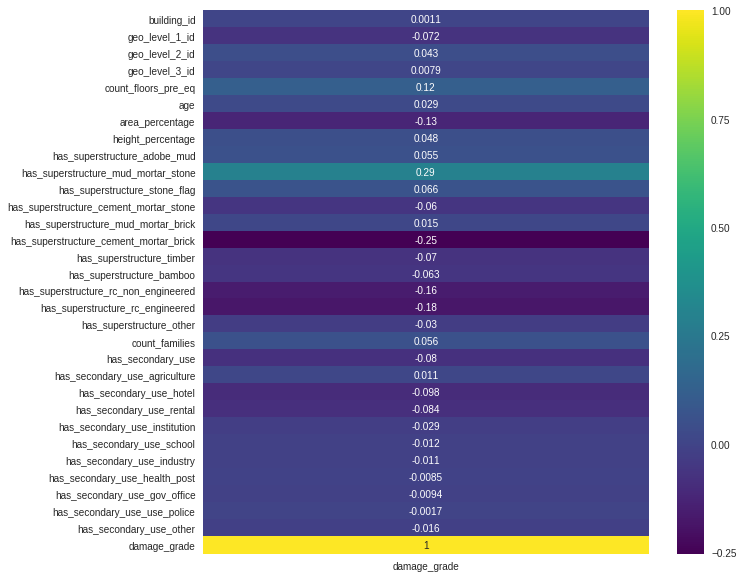

In [15]:
plt.figure(figsize=(10,10))
cor=train.corr()["damage_grade"]
cor=pd.DataFrame(cor)
sns.heatmap(cor,annot=True,cmap="viridis")

### ***Analyse binary Features with respect to Damage Grade ?***

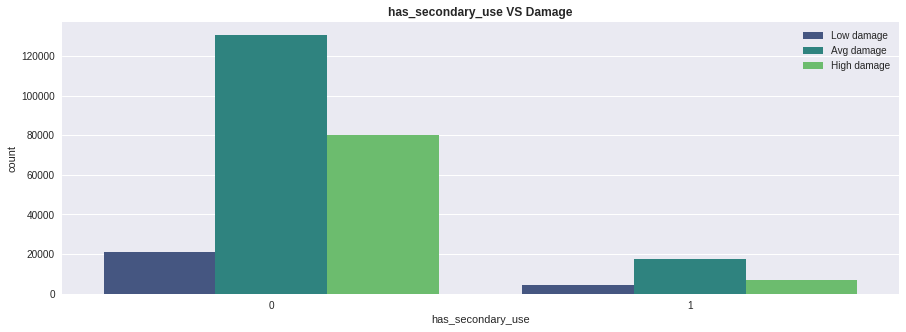

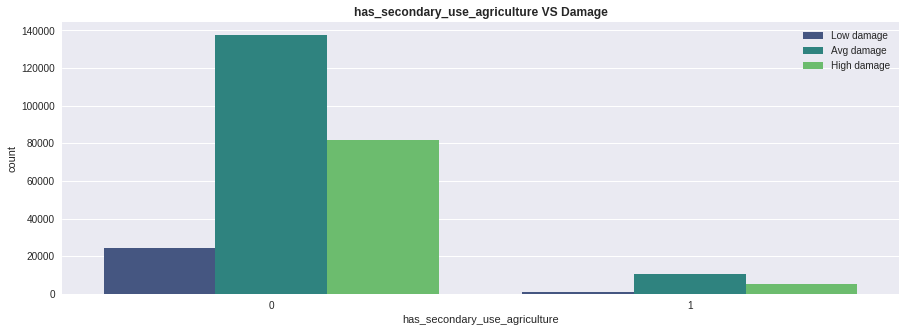

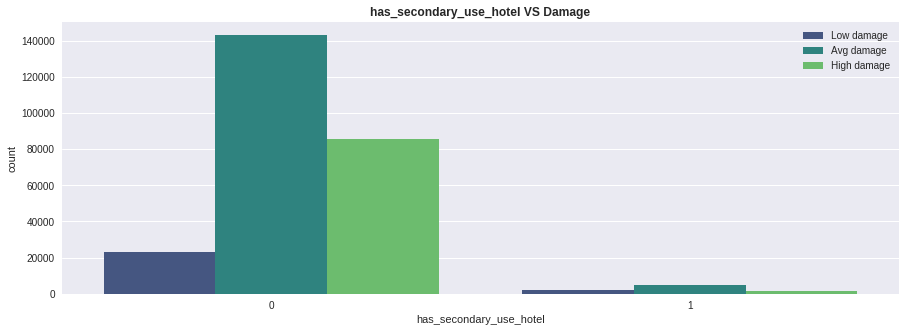

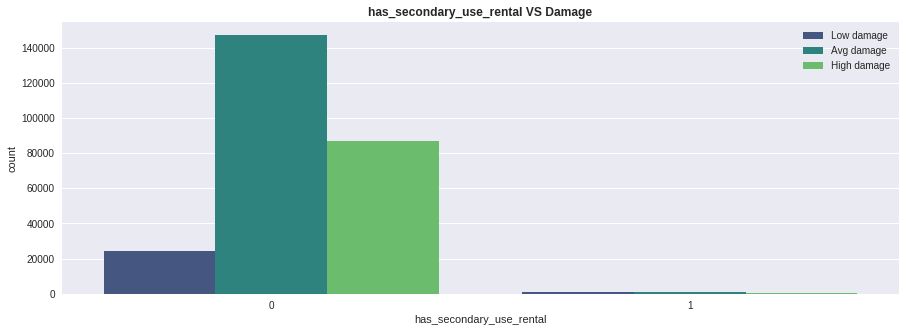

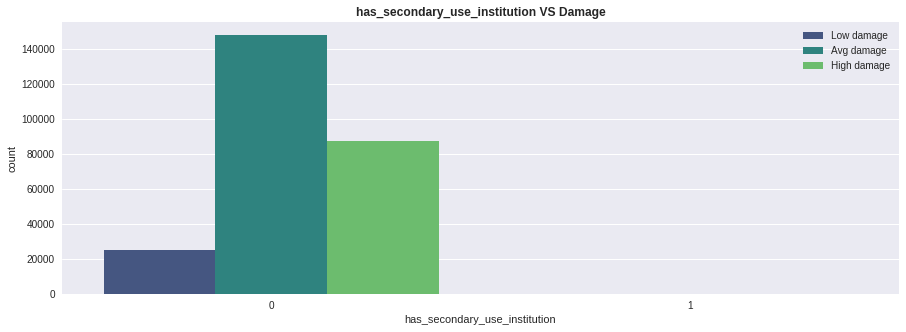

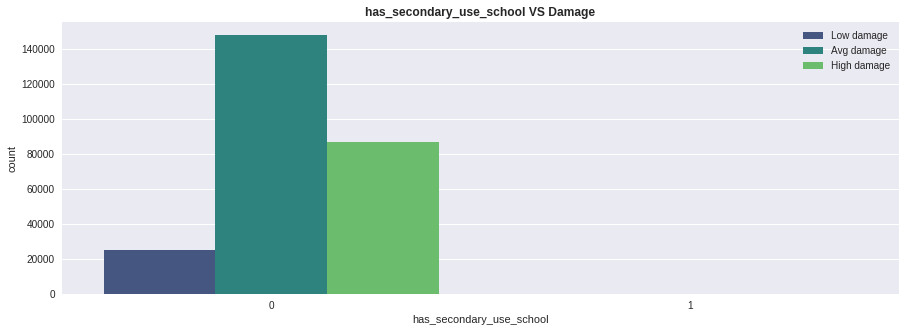

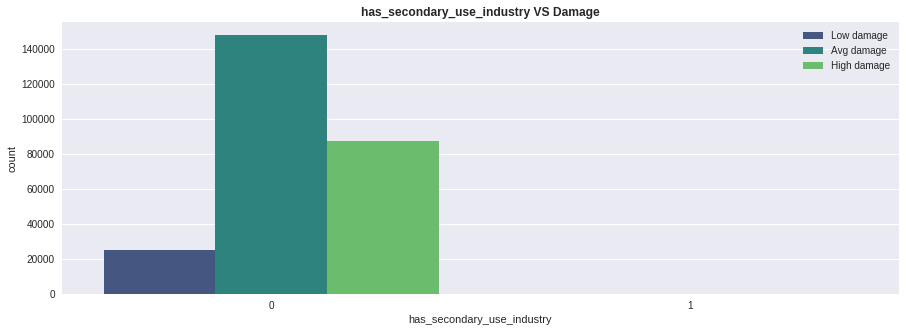

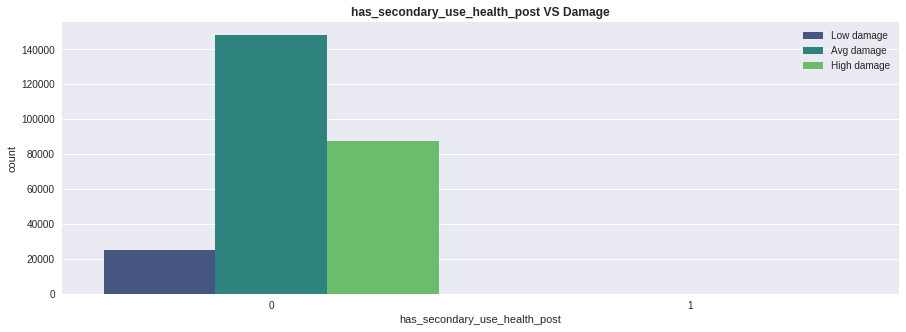

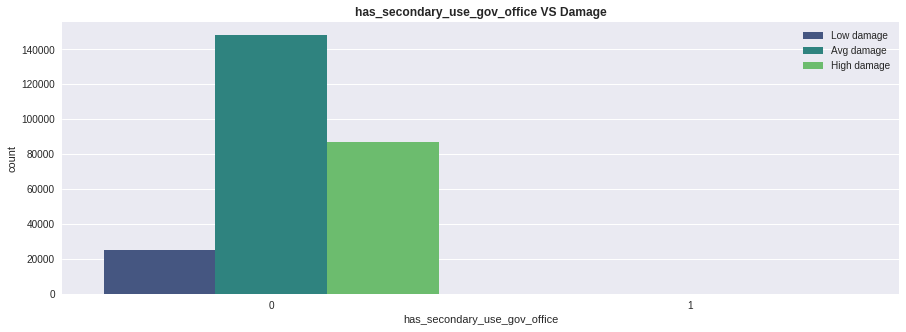

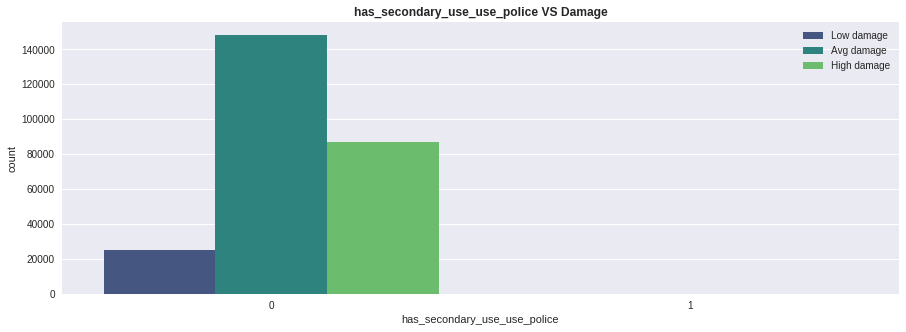

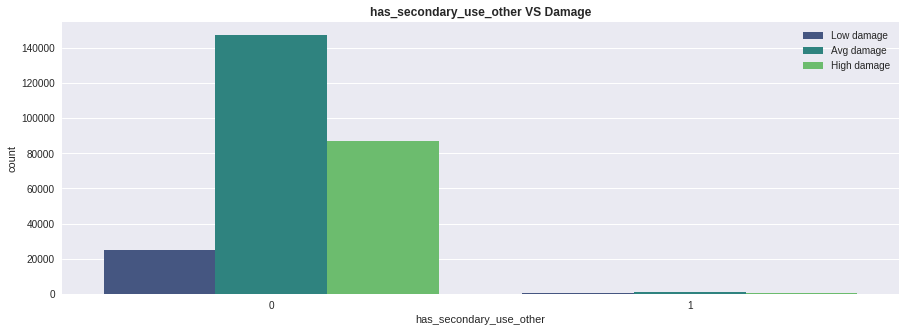

In [16]:
binary_cols=["has_secondary_use","has_secondary_use_agriculture",
          "has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution","has_secondary_use_school","has_secondary_use_industry",
          "has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police","has_secondary_use_other"]
for col in binary_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(train[col],hue=train.damage_grade,palette="viridis")
    plt.title(col+ " VS Damage",fontweight="bold")
    plt.legend(["Low damage","Avg damage","High damage"]) 
    plt.show()

### ***Do we have any outliers in the dataset ?***

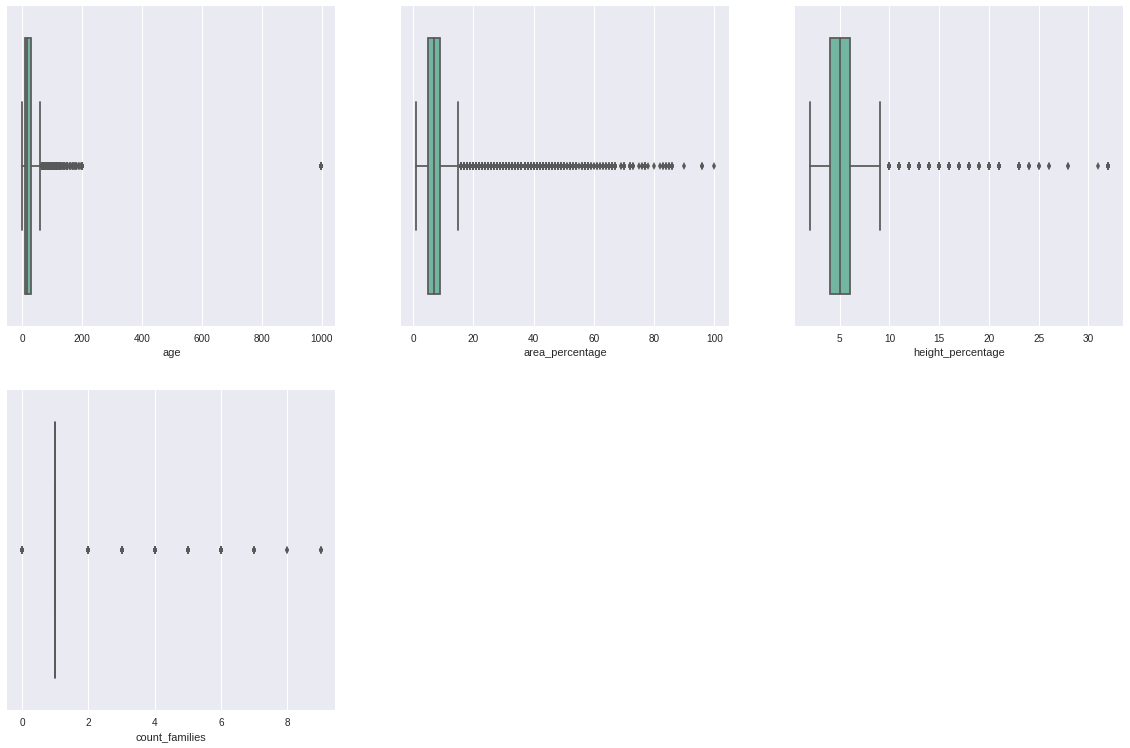

In [17]:
boxplot_cols=["age","area_percentage","height_percentage","count_families"]
q=1
plt.figure(figsize=(20,20))
for j in boxplot_cols:
    plt.subplot(3,3,q)
    ax=sns.boxplot(train[j].dropna(),palette="Set2")
    plt.xlabel(j)
    q+=1
plt.show()

- ***OBSERVATION***
    - The data consists of many outliers.

### ***Model Building***

In [18]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [19]:
# copying the original dataset into X
X=train
# droping building_id and dependent variable damage_grade
# independant variables
X=X.drop(["damage_grade","building_id"],axis=1)
# dependent variable
y=train["damage_grade"]

In [20]:
# label encoding the categorical variables
label_encoding_columns=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']
# label encoding categorical columns in train dataset 
for i in label_encoding_columns:
    X[i]=X[i].astype("category")
    X[i]=X[i].cat.codes
# label encoding categorical columns in test dataset
for j in label_encoding_columns:
    test[j]=test[j].astype("category")
    test[j]=test[j].cat.codes

### ***Selecting Hyperparameters using Grid Search ?***

In [21]:
"""rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X, y)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]"""

"rf = RandomForestClassifier()\nparam = {'n_estimators': [10, 150, 300],\n        'max_depth': [30, 60, 90, None]}\n\ngs = GridSearchCV(rf, param, cv=5, n_jobs=-1)\ngs_fit = gs.fit(X, y)\npd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]"

### ***Model : Random Forest***

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

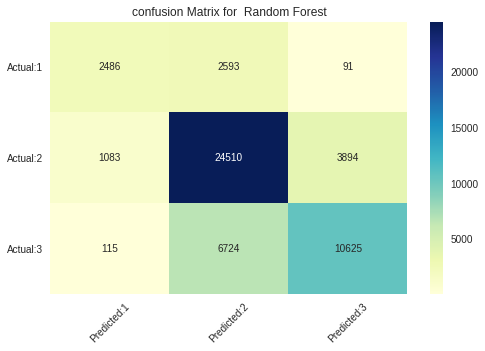

In [23]:
rf = RandomForestClassifier(n_estimators = 500,random_state = 1, max_depth=None,n_jobs=-1)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
cm=confusion_matrix(y_test,rf_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

In [24]:
print("-"*100)
print("Accuracy Score for Random Forest :",accuracy_score(y_test,rf_pred))
print("-"*100)
print("\n")
print("classification report for Random Forest :\n\n",classification_report(y_test, rf_pred))
print("-"*100)

----------------------------------------------------------------------------------------------------
Accuracy Score for Random Forest : 0.7218011933769498
----------------------------------------------------------------------------------------------------


classification report for Random Forest :

               precision    recall  f1-score   support

           1       0.67      0.48      0.56      5170
           2       0.72      0.83      0.77     29487
           3       0.73      0.61      0.66     17464

    accuracy                           0.72     52121
   macro avg       0.71      0.64      0.67     52121
weighted avg       0.72      0.72      0.72     52121

----------------------------------------------------------------------------------------------------


In [25]:
# Predicting with test set
test=test.drop("building_id",axis=1)
rf_pred_test=rf.predict(test)


In [26]:
submission=pd.read_csv("/kaggle/input/richters-predictor-modeling-earthquake-damage/submission_format.csv")
submission=submission.drop("damage_grade",axis=1)
rf_pred_test=pd.DataFrame(rf_pred_test)
submission["damage_grade"]=rf_pred_test
submission.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
